<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab5/B40_E22CSEU1183_SANCHIT/LAB_7/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0117 - val_loss: 0.0053
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0038 - val_loss: 0.0039
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


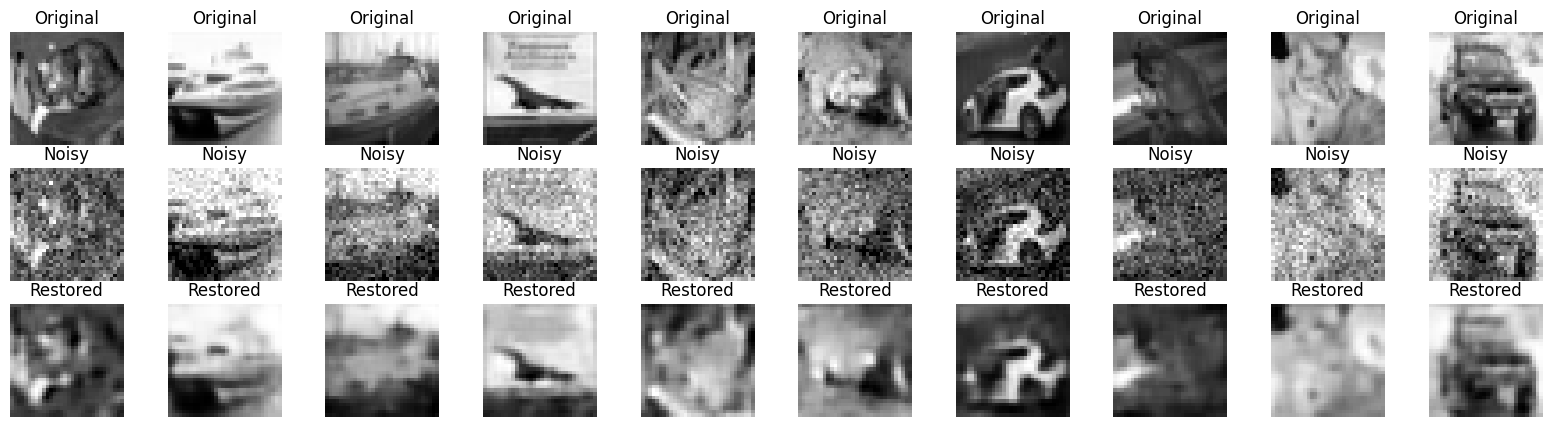

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2

# Step 1: Load & Preprocess Data
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize pixel values between [0,1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Resize images if necessary
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# Convert to grayscale (if required)
x_train_gray = np.mean(x_train, axis=-1, keepdims=True)
x_test_gray = np.mean(x_test, axis=-1, keepdims=True)

# Step 2: Simulate Degradation
def add_noise(img):
    noise = np.random.normal(0, 0.1, img.shape)
    return np.clip(img + noise, 0., 1.)

x_train_noisy = add_noise(x_train_gray)
x_test_noisy = add_noise(x_test_gray)

# Step 3: Build the Autoencoder Model
input_img = Input(shape=(32, 32, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics='accuracy')

# Step 4: Train the Model
autoencoder.fit(x_train_noisy, x_train_gray, epochs=10, batch_size=32, validation_data=(x_test_noisy, x_test_gray))

# Step 5: Image Restoration & Evaluation
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display original, degraded, and restored images
n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_gray[i].reshape(32, 32), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(32, 32), cmap='gray')
    plt.title("Restored")
    plt.axis('off')

plt.show()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.0100 - loss: 4.6079 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.0098 - loss: 4.6101 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.0090 - loss: 4.6057 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.0098 - loss: 4.6057 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.0085 - loss: 4.6056 - val_accuracy: 0.0100 - val_loss: 4.6052
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 48ms/step - accuracy: 0.0083 - loss: 4.6108 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.0099 - loss: 4.6055 - val_accuracy: 0.01

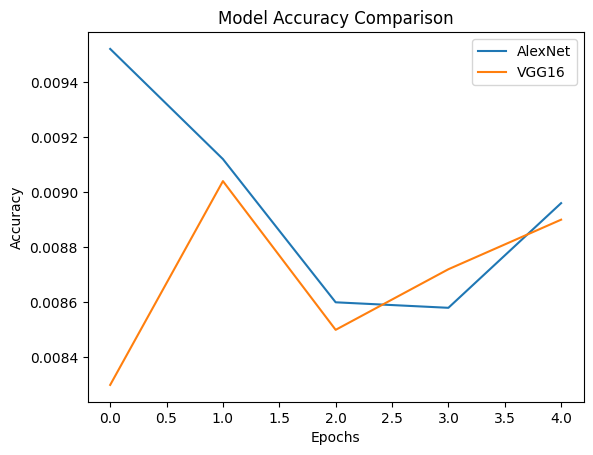

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
import numpy as np
import time
import matplotlib.pyplot as plt

# Load & Preprocess Data
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

    # Use original 32x32 images to reduce memory usage
    x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
    return x_train, y_train, x_test, y_test

# Define Optimized AlexNet Model
def build_alexnet():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(96, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Load Pretrained VGG16 Model with Optimization
def build_vgg16():
    base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    x = layers.Flatten()(base_model.output)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(100, activation='softmax')(x)
    model = models.Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train Model
def train_model(model, x_train, y_train, x_test, y_test, epochs=5, batch_size=32):
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), batch_size=batch_size)
    elapsed_time = time.time() - start_time
    return history, elapsed_time

# Evaluate Model
def evaluate_model(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    return accuracy

# Load Data
x_train, y_train, x_test, y_test = load_data()

# Build and Train AlexNet
alexnet = build_alexnet()
alexnet_history, alexnet_time = train_model(alexnet, x_train, y_train, x_test, y_test)
alexnet_acc = evaluate_model(alexnet, x_test, y_test)
del alexnet  # Free memory

# Build and Train VGG16
vgg16 = build_vgg16()
vgg16_history, vgg16_time = train_model(vgg16, x_train, y_train, x_test, y_test)
vgg16_acc = evaluate_model(vgg16, x_test, y_test)

del vgg16  # Free memory

# Compare Results
print(f"AlexNet Accuracy: {alexnet_acc:.2f}, Training Time: {alexnet_time:.2f}s")
print(f"VGG16 Accuracy: {vgg16_acc:.2f}, Training Time: {vgg16_time:.2f}s")

# Plot Accuracy Comparison
plt.plot(alexnet_history.history['accuracy'], label='AlexNet')
plt.plot(vgg16_history.history['accuracy'], label='VGG16')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()